In [1]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
df = fdr.DataReader('005930', '2000-01-01', '2023-05-17')
df2=fdr.DataReader('HYMTF', '2000-01-01', '2023-05-17')

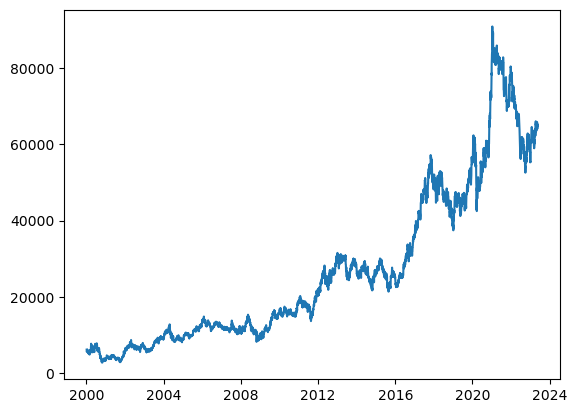

In [15]:
plt.plot(df['Close'])

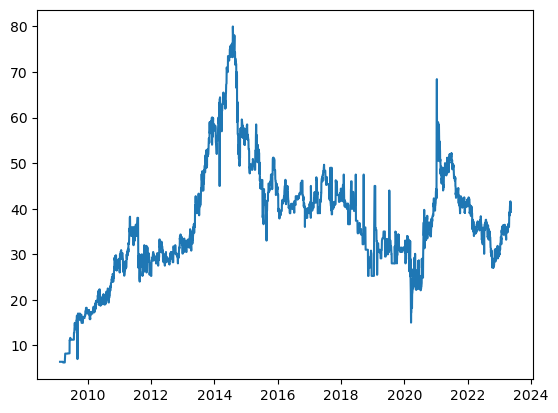

In [18]:
plt.plot(df2['Close'])

In [19]:
df = fdr.DataReader('005930', '2018-05-04', '2023-05-17')

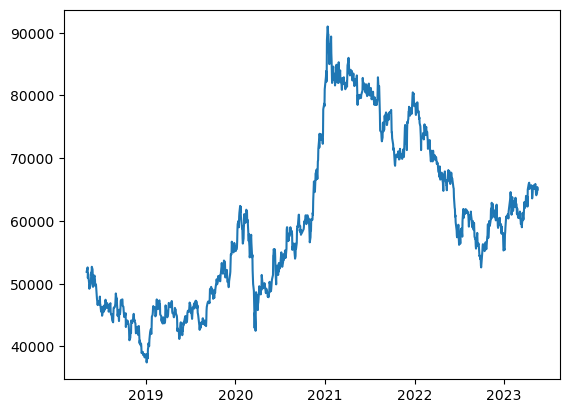

In [21]:
plt.plot(df['Close'])

In [22]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [23]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2018-05-04,0.294229,0.275338,0.283951,0.409302
2018-05-08,0.286660,0.263514,0.285850,0.217675
2018-05-09,0.286660,0.256757,0.266857,0.136459
2018-05-10,0.269631,0.238176,0.261159,0.110579
2018-05-11,0.275307,0.246622,0.272555,0.068783
...,...,...,...,...
2023-05-11,0.515610,0.464527,0.519468,0.084312
2023-05-12,0.496689,0.456081,0.508072,0.049912
2023-05-15,0.504257,0.456081,0.513770,0.043836


In [26]:
x=dfx.values.tolist()
y=dfy.values.tolist()

In [28]:
x[0]

[0.29422894985753223,
 0.27533783783737276,
 0.2839506172834113,
 0.4093015703464012]

In [29]:
y[0]

[0.26984126984076595]

In [31]:
window_size = 10

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

[[0.5402081362336041, 0.48479729729647836, 0.5365622032278508, 0.11630335473093786], [0.5231788079460299, 0.472972972972174, 0.5327635327625209, 0.052040004914571995], [0.5326395458835712, 0.47466216216136037, 0.528964862297191, 0.06268399522857164], [0.5458845789961289, 0.48479729729647836, 0.5422602089258457, 0.05819388359295443], [0.5364238410585876, 0.4763513513505467, 0.5365622032278508, 0.057745639603683514], [0.5307473982960629, 0.4712837837829877, 0.5213675213665311, 0.10071282482351544], [0.5156102175959969, 0.4645270270262423, 0.5194681861338661, 0.08431203546519844], [0.4966887417209145, 0.45608108108031065, 0.5080721747378764, 0.04991152117204296], [0.5042573320709475, 0.45608108108031065, 0.5137701804358713, 0.04383591988260342], [0.5364238410585876, 0.47804054053973305, 0.5403608736931806, 0.09229521155418953]] -> [0.5144724556479655]


In [35]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

훈련 데이터의 크기 : (861, 10, 4) (861, 1)
테스트 데이터의 크기 : (370, 10, 4) (370, 1)


In [36]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

훈련 데이터의 크기 : (861, 10, 4) (861, 1)
테스트 데이터의 크기 : (370, 10, 4) (370, 1)


In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [38]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_x)

Epoch 1/70
29/29 [==============================] - 2s 5ms/step - loss: 0.1058
Epoch 2/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 3/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 4/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 5/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 6/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 7/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 8/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 9/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 10/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 11/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 12/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 13/70
29/29 [==============================

In [44]:
pred_y

array([[0.6166681 ],
       [0.6111833 ],
       [0.6056429 ],
       [0.6267432 ],
       [0.6585066 ],
       [0.6806327 ],
       [0.6822659 ],
       [0.6666373 ],
       [0.6461706 ],
       [0.6386417 ],
       [0.6398533 ],
       [0.65542805],
       [0.6757293 ],
       [0.691537  ],
       [0.70437324],
       [0.7226645 ],
       [0.72921765],
       [0.72082365],
       [0.7211672 ],
       [0.7142625 ],
       [0.7106259 ],
       [0.7191466 ],
       [0.72060037],
       [0.7194778 ],
       [0.7229123 ],
       [0.7340847 ],
       [0.74586165],
       [0.7558416 ],
       [0.75852823],
       [0.7586231 ],
       [0.75544   ],
       [0.7463751 ],
       [0.7458519 ],
       [0.74508166],
       [0.74160135],
       [0.72438705],
       [0.7241473 ],
       [0.72641146],
       [0.73518777],
       [0.743768  ],
       [0.7458677 ],
       [0.73267233],
       [0.7221081 ],
       [0.7193457 ],
       [0.71075046],
       [0.7030754 ],
       [0.69334507],
       [0.687

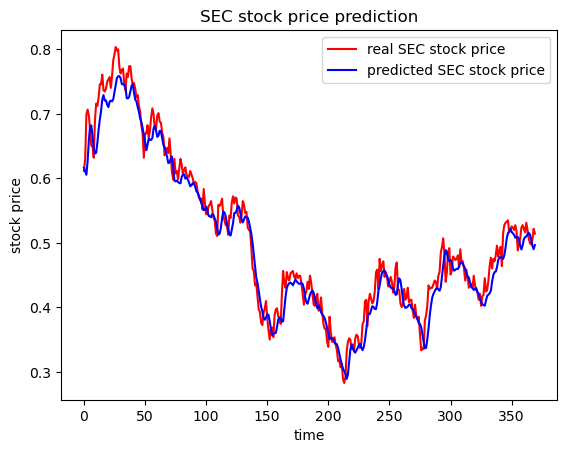

내일 SEC 주가 : [62743.707] KRW


In [45]:
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')